In [1]:
taxi = pd.read_csv("/Users/jisuim/Desktop/tp_taxi/jisu/train.csv")

In [25]:
taxi.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [2]:
len(taxi)

1458644

> id는 a unique identifier for each trip, vendor_id = 공급업체?

> datetime = meter기 on/off

> store and fwd flag = Y:저장전달

In [3]:
taxi2 = taxi.dropna(how = 'any')

In [10]:
len(taxi2)

1458644

> missing data 없음

- 출발시간대에 따라 분류(월별, 요일별, 시간대별)
- 도착시간대에 따라 분류(필요없을듯)
- 인원수(관계거의없을것지만 상관관계 체크)
- 출발지와 도착지 직선거리계산 -> 시간과의 상관관계 체크


In [4]:
taxi_test = pd.read_csv("/Users/jisuim/Desktop/tp_taxi/jisu/test.csv")

In [5]:
taxi_test.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


# pickup_datetime 오름차순으로 데이터 sort

In [15]:
taxi_sort = taxi.sort_values(by=['pickup_datetime'], ascending=True).reset_index(drop=True)

In [64]:
len(taxi_sort)

1458644

In [35]:
taxi_sort.loc[1000]

id                              id2617702
vendor_id                               1
pickup_datetime       2016-01-01 01:49:25
dropoff_datetime      2016-01-01 02:04:00
passenger_count                         1
pickup_longitude                 -73.9841
pickup_latitude                   40.7376
dropoff_longitude                -73.9514
dropoff_latitude                    40.77
store_and_fwd_flag                      N
trip_duration                         875
month                                  01
Name: 1000, dtype: object

> 월별 index 추가

In [16]:
for i in range(len(taxi_sort)):
    k = taxi_sort['pickup_datetime'][i][5:7]
    taxi_sort.at[i, "month"] = k 

In [24]:
taxi_month = pd.DataFrame(taxi_sort, columns=["month", "trip_duration"])

In [45]:
taxi_month.groupby('month').agg('mean').reset_index()  ### 월별 평균 trip_duration

,month,trip_duration
0,01,922.373319
1,02,920.830453
2,03,937.365363
3,04,962.891462
4,05,999.450555
5,06,1013.367226


> 시간대별 index 추가

In [63]:
for i in range(len(taxi_sort)):
    k = taxi_sort['pickup_datetime'][i][11:13]
    taxi_sort.at[i, "time"] = k
    

In [47]:
taxi_time = pd.DataFrame(taxi_sort, columns=["time", "trip_duration"])

In [48]:
taxi_time.groupby("time").agg("mean").reset_index() ### 시간대별 평균 trip_duration

,time,trip_duration
0,00,936.657302
1,01,903.087112
2,02,890.076934
3,03,890.070878
4,04,921.976444
5,05,822.298960
6,06,797.434943
7,07,831.758345
8,08,924.559199
9,09,933.528915


> 요일별 index 추가

In [67]:
import calendar
for i in range(len(taxi_sort)):
    m = taxi_sort['pickup_datetime'][i][5:7]
    d = taxi_sort['pickup_datetime'][i][8:10]
    k = calendar.weekday(2016, int(m), int(d))
    taxi_sort.at[i, "weekday"] = k

In [68]:
taxi_weekday = pd.DataFrame(taxi_sort, columns=['weekday','trip_duration'])

In [69]:
taxi_weekday.groupby('weekday').agg('mean').reset_index() ### 요일별 평균 trip_duration (0~6 : Mon~Sun)

,weekday,trip_duration
0,0.0,897.947839
1,1.0,983.463124
2,2.0,975.450494
3,3.0,1006.528654
4,4.0,990.224200
5,5.0,948.051175
6,6.0,901.639395


> store and flag로 나누기

In [8]:
taxi_snf = pd.DataFrame(taxi, columns=['store_and_fwd_flag', 'trip_duration'])

In [9]:
taxi_snf.groupby('store_and_fwd_flag').agg('mean').reset_index()

,store_and_fwd_flag,trip_duration
0,N,958.819706
1,Y,1080.763331


> passenger 수별로 나누기

In [10]:
taxi_passenger = pd.DataFrame(taxi, columns=['passenger_count', 'trip_duration'])

In [11]:
taxi_passenger.groupby('passenger_count').agg('mean').reset_index()

,passenger_count,trip_duration
0,0,1718.433333
1,1,930.399753
2,2,1005.458335
3,3,1028.236276
4,4,1053.529749
5,5,1070.232174
6,6,1061.355223
7,7,19.666667
8,8,104.000000
9,9,560.000000


# outlier removal

> 
1. trip_duration이 0인 column은 없다. 1인 경우는 있지만 택시를 타고 바로내린 경우로 생각해야하는가?
2. passenger 수가 0인 경우 -> 어떻게 처리해야할지?
3. 직선거리가 0인 경우

In [13]:
taxi.loc[taxi.trip_duration == 1, 'trip_duration']

35196      1
207497     1
269418     1
279493     1
285635     1
311745     1
346102     1
346959     1
404610     1
451396     1
467645     1
533799     1
555237     1
563953     1
596136     1
600247     1
610159     1
726971     1
761666     1
767271     1
810851     1
918415     1
1029695    1
1034341    1
1056854    1
1063496    1
1125014    1
1165514    1
1296239    1
1306890    1
1360664    1
1382872    1
1439166    1
Name: trip_duration, dtype: int64

In [16]:
len(taxi.loc[taxi.passenger_count == 0]) ### passenger_count 가 0인경우 60개

60

## 직선거리 구하기

In [2]:
## 직선거리 함수
from math import cos, asin, sqrt
def dist(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))


In [3]:
## distance 칼럼 추가
for i in range(len(taxi)):
    lat1 = taxi['pickup_latitude'][i]
    lon1 = taxi['pickup_longitude'][i]
    lat2 = taxi['dropoff_latitude'][i]
    lon2 = taxi['dropoff_longitude'][i]
    taxi.at[i, 'distance'] = dist(lat1, lon1, lat2, lon2)


In [11]:
taxi['distance'].max(), taxi['distance'].min()  ## 직선거리 최대, 최소

(1240.9086766508517, 0.0)

In [15]:
len(taxi.loc[taxi.distance == 0]) ## 직선거리가 0인 경우 

5897

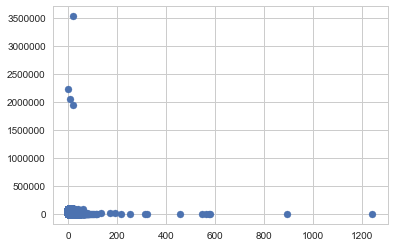

In [7]:
plt.scatter(taxi['distance'], taxi['trip_duration'])  ## distance와 trip_duration의 scatterplot
plt.show()

In [16]:
## distance가 0인 데이터 제거
taxi.loc[taxi.distance == 0, 'distance'] = np.nan
taxi.dropna(inplace=True)
len(taxi)

1452747

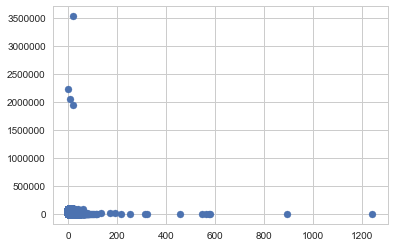

In [17]:
plt.scatter(taxi['distance'], taxi['trip_duration'])
plt.show()

In [36]:
30000/3600

8.333333333333334

In [34]:
taxi.loc[taxi.trip_duration > 30000, 'trip_duration'] = np.nan ##30000초(약 8시간)가 넘는 데이터 제거
taxi.dropna(inplace=True)
len(taxi)

1450718

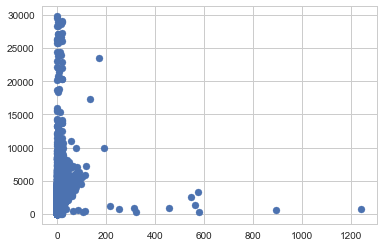

In [35]:
plt.scatter(taxi['distance'], taxi['trip_duration'])
plt.show()

In [51]:
taxi.loc[taxi.trip_duration > 15000] = np.nan ##15000초(약 4시간)가 넘는 데이터 제거 ->모두 200km이내 이다.
taxi.dropna(inplace=True)

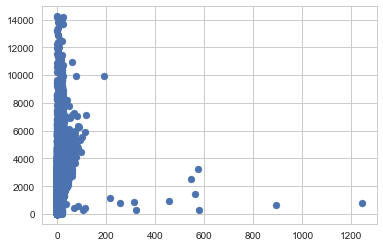

In [52]:
plt.scatter(taxi['distance'], taxi['trip_duration'])
plt.show()

> 
- 4000초(약 1시간)이내에서 distance가 200km가 넘을 수 없다. ($\because$자동차 최대속도)

In [55]:
taxi.loc[taxi.distance > 200] = np.nan ##200km 넘는 데이터 제거
taxi.dropna(inplace=True)

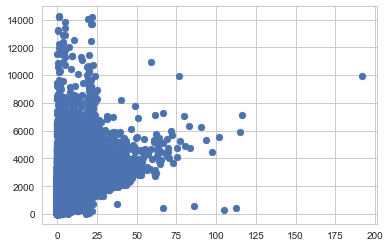

In [56]:
plt.scatter(taxi['distance'], taxi['trip_duration'])
plt.show()

> distance가 25km이내이면서 trip_duration이 14000초(3.8시간)이상이면 평균 시속 6.5km로 운행한다는 뜻이다.

> 하지만 날씨의 영향을 받을수 있으므로 나중에 고려한다.